# Learning curves

Learning curves constructed using subsets of the old bands dataset

## Imports

In [92]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# I/O
import json
import pathlib

# Latex fonts
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

## Data

Data copied over form LC-0 through LC-07 in code/learning-curve

In [19]:
# fractions of training set used as dict keys 
lc = {
    1.0:{'n_train_samples': 86793,
         'n_val_samples': 21699, 
         'MSE': 6.528728220884754e-07,
         'RMSE': 0.0008080054591947231,
         'MPE': -0.002756491536545924,
         'MAPE': 0.25454262125665994},
    0.5:{'n_train_samples': 43396,
         'n_val_samples': 10849,
         'MSE': 1.039079010392775e-06,
         'RMSE': 0.0010193522503986416,
         'MPE': 0.0087024758524067,
         'MAPE': 0.3169118072476999},
    0.25:{'n_train_samples': 21698,
          'n_val_samples': 5424, 
          'MSE': 1.9915994417469904e-06, 
          'RMSE': 0.0014112403911974, 
          'MPE': -0.011117548956644645, 
          'MAPE': 0.43733221816299706},
    0.125:{'n_train_samples': 10849,
           'n_val_samples': 2712, 
           'MSE': 3.8279355886509805e-06, 
           'RMSE': 0.0019565110755247416, 
           'MPE': 0.006822595068091035, 
           'MAPE': 0.6092503168945629},
    0.0625:{'n_train_samples': 5424,
            'n_val_samples': 1356, 
            'MSE': 8.629638316526836e-06,
            'RMSE': 0.0029376246044256296, 
            'MPE': -0.01280026260573658, 
            'MAPE': 0.9176620650079275},
    0.03125:{'n_train_samples': 2712,
             'n_val_samples': 678, 
             'MSE': 1.739800065862845e-05, 
             'RMSE': 0.004171091063334443, 
             'MPE': 0.027330020499956663, 
             'MAPE': 1.310309793987777},
    0.015625:{'n_train_samples': 1356, 
              'n_val_samples': 339, 
              'MSE': 4.143270358662546e-05, 
              'RMSE': 0.006436824029490433, 
              'MPE': -0.08988595668507529, 
              'MAPE': 1.995829335390},
    0.0078125:{'n_train_samples': 678,
               'n_val_samples': 169,
               'MSE': 6.599804366234734e-05, 
               'RMSE': 0.008123917999484444, 
               'MPE': -0.1497454627922542, 
               'MAPE': 2.5453468138417565}
}

In [13]:
save_dir = pathlib.Path("../analysis/learning-curve")

In [14]:
save_dir.exists()

True

In [17]:
with open(save_dir / 'learning-curve-data.json', 'w') as f:
    json.dump(lc, f)

## Plots

In [172]:
# Polynomial fit
def poly_func(x, a, b):
    return a*x**b

In [173]:
def plot_lc(x="split", y="MSE", y_scale="log", x_scale="log", fit = True):
    
    if x == "split":
        xs = list(lc.keys())
        xlabel = "split"
    else:
        xs =[lc[split]["n_train_samples"] for split in lc.keys()]
        xlabel = "samples"
    ys = [lc[split][y] for split in lc.keys()]
    
    fig, ax = plt.subplots(1, figsize=(6,6), dpi=500)
    ax.plot(xs, ys, label=y, marker="o")

    # Curve fit
    if fit:
        popt, pcov = curve_fit(poly_func, xs, ys)
        fine_xs = np.linspace(np.min(xs), np.max(xs),100)
        ax.plot(fine_xs, poly_func(fine_xs,*popt),
                label = r"fit: $a x^b$ with a=%5.3f, b=%5.3f" % tuple(popt),
               alpha = 0.7)        
    ax.set_xscale(x_scale)
    ax.set_yscale(y_scale)
    ax.set_title("Learning curve")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(y)
    ax.legend()
    return fig, ax

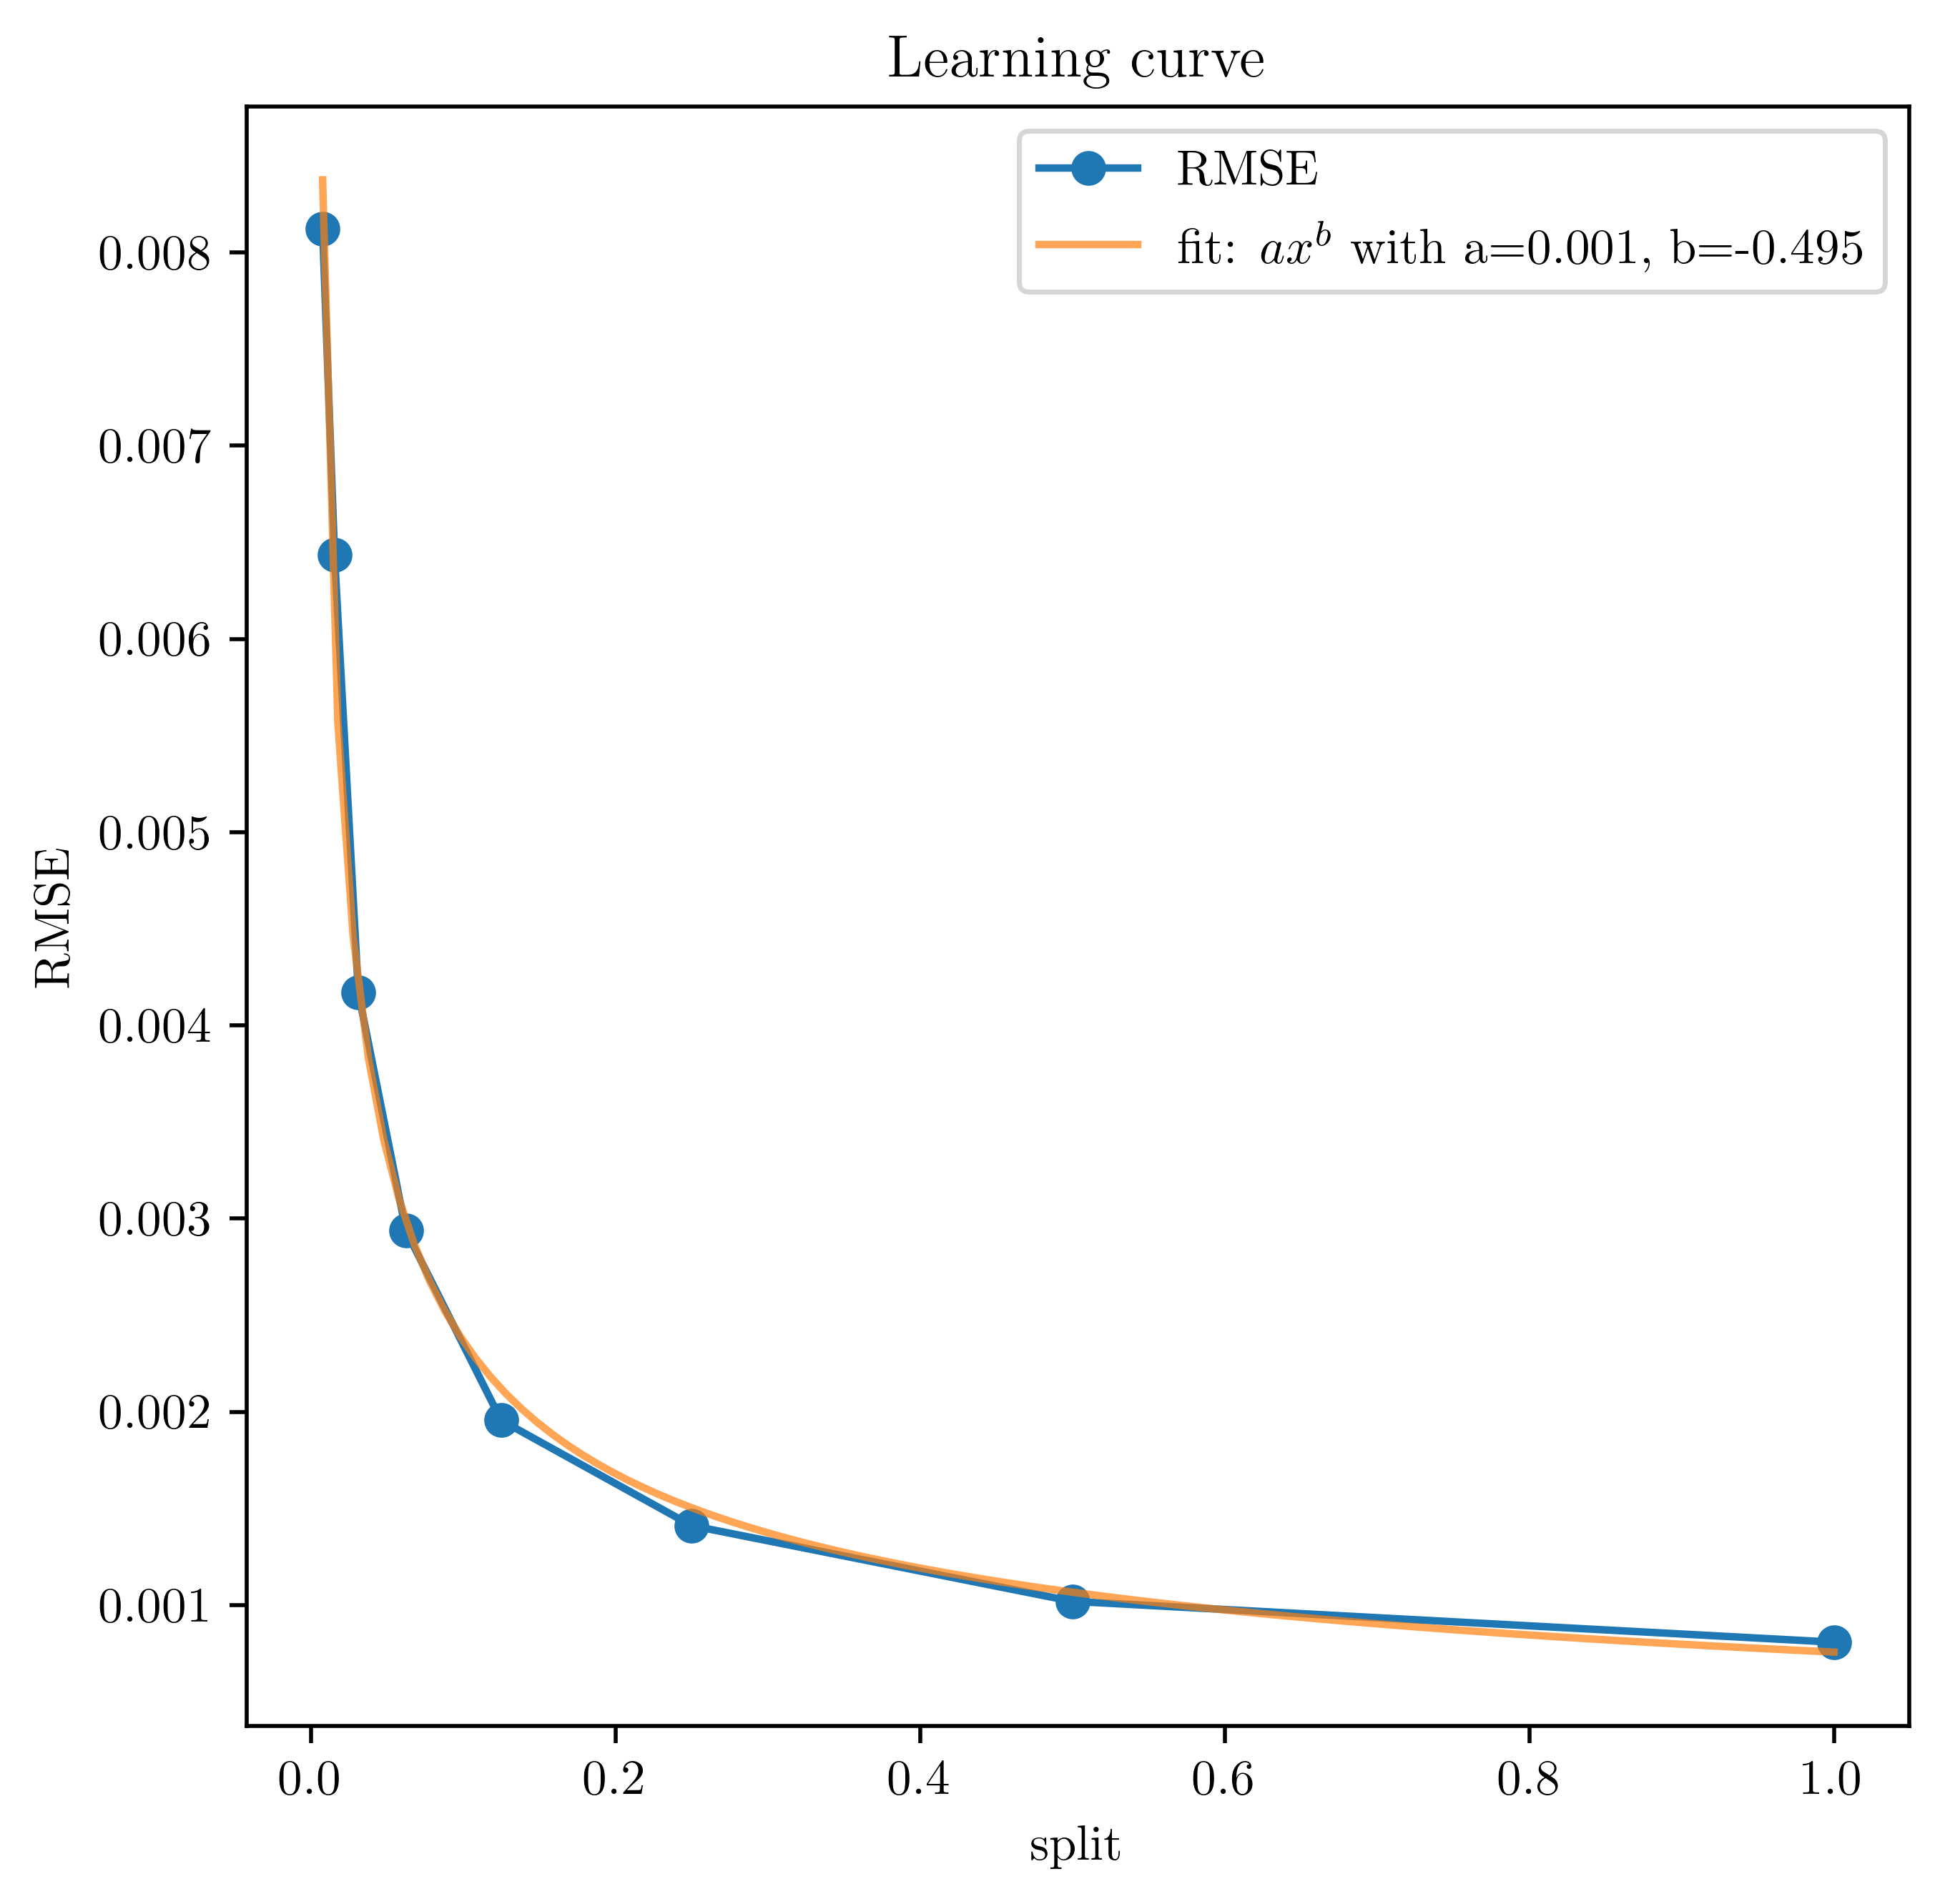

In [174]:
plot_lc(x="split", y="RMSE", y_scale="linear", x_scale = "linear");

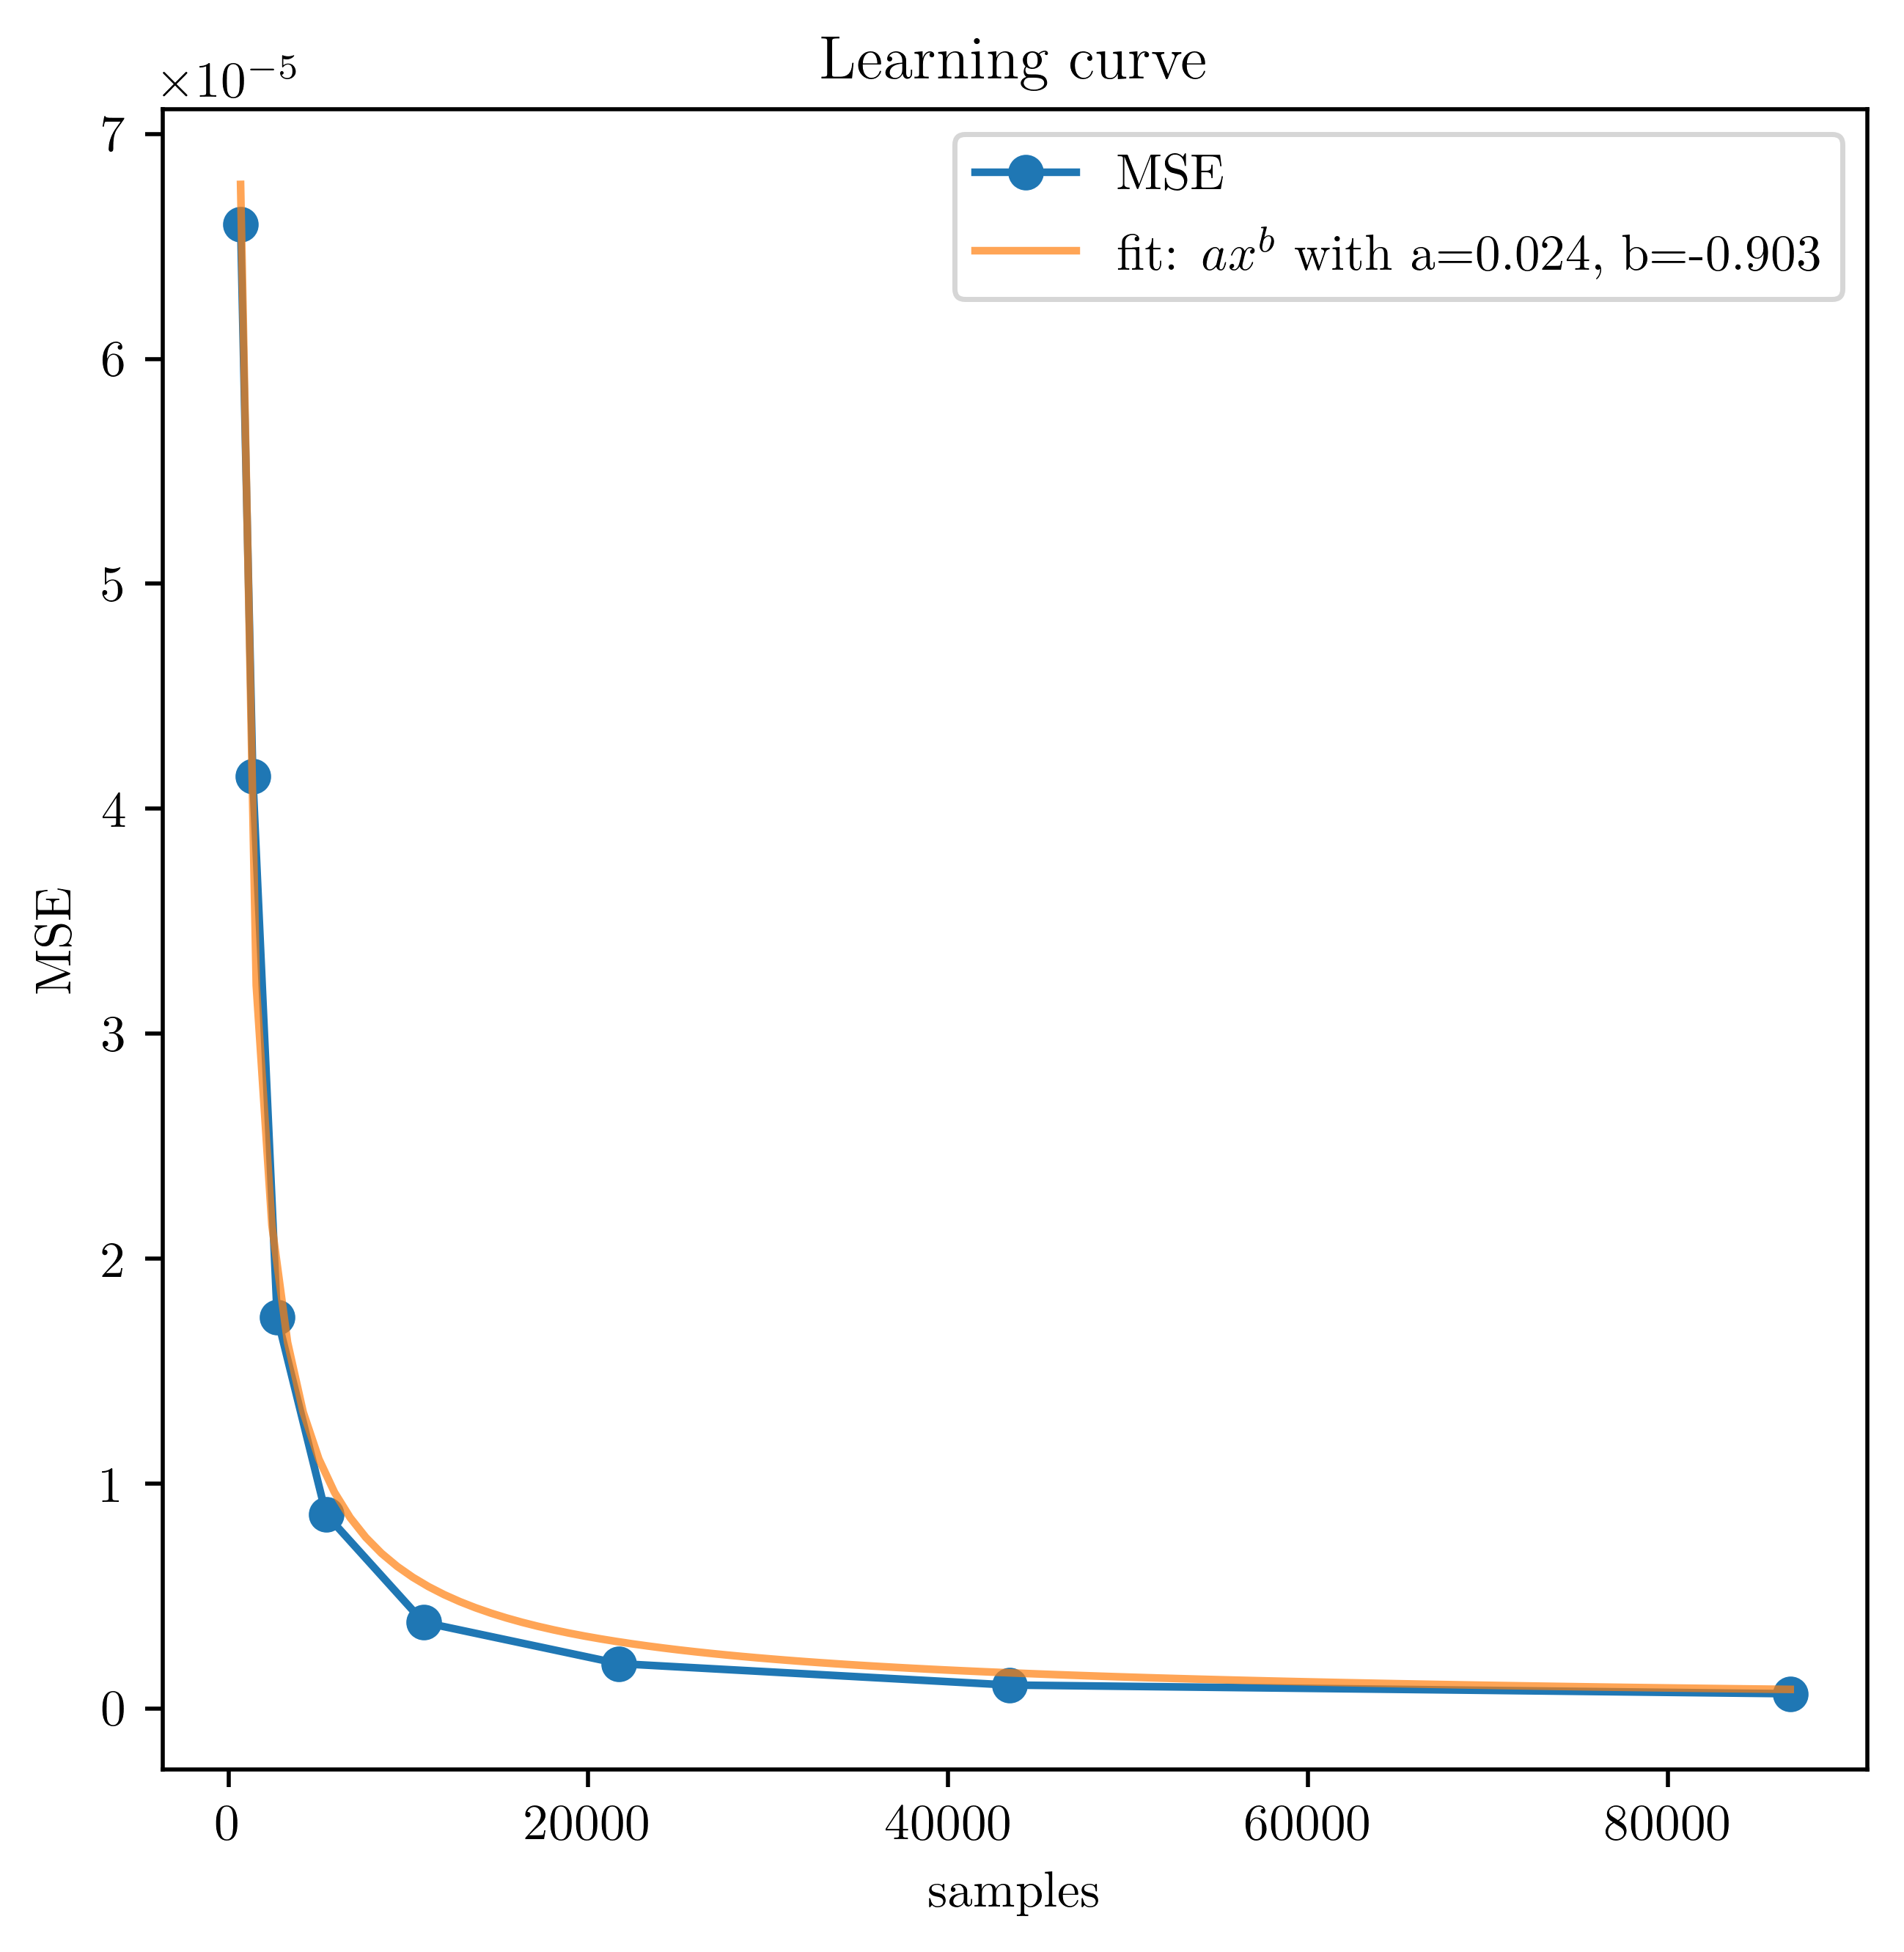

In [152]:
plot_lc(x="samples", y="MSE", y_scale="linear", x_scale = "linear");

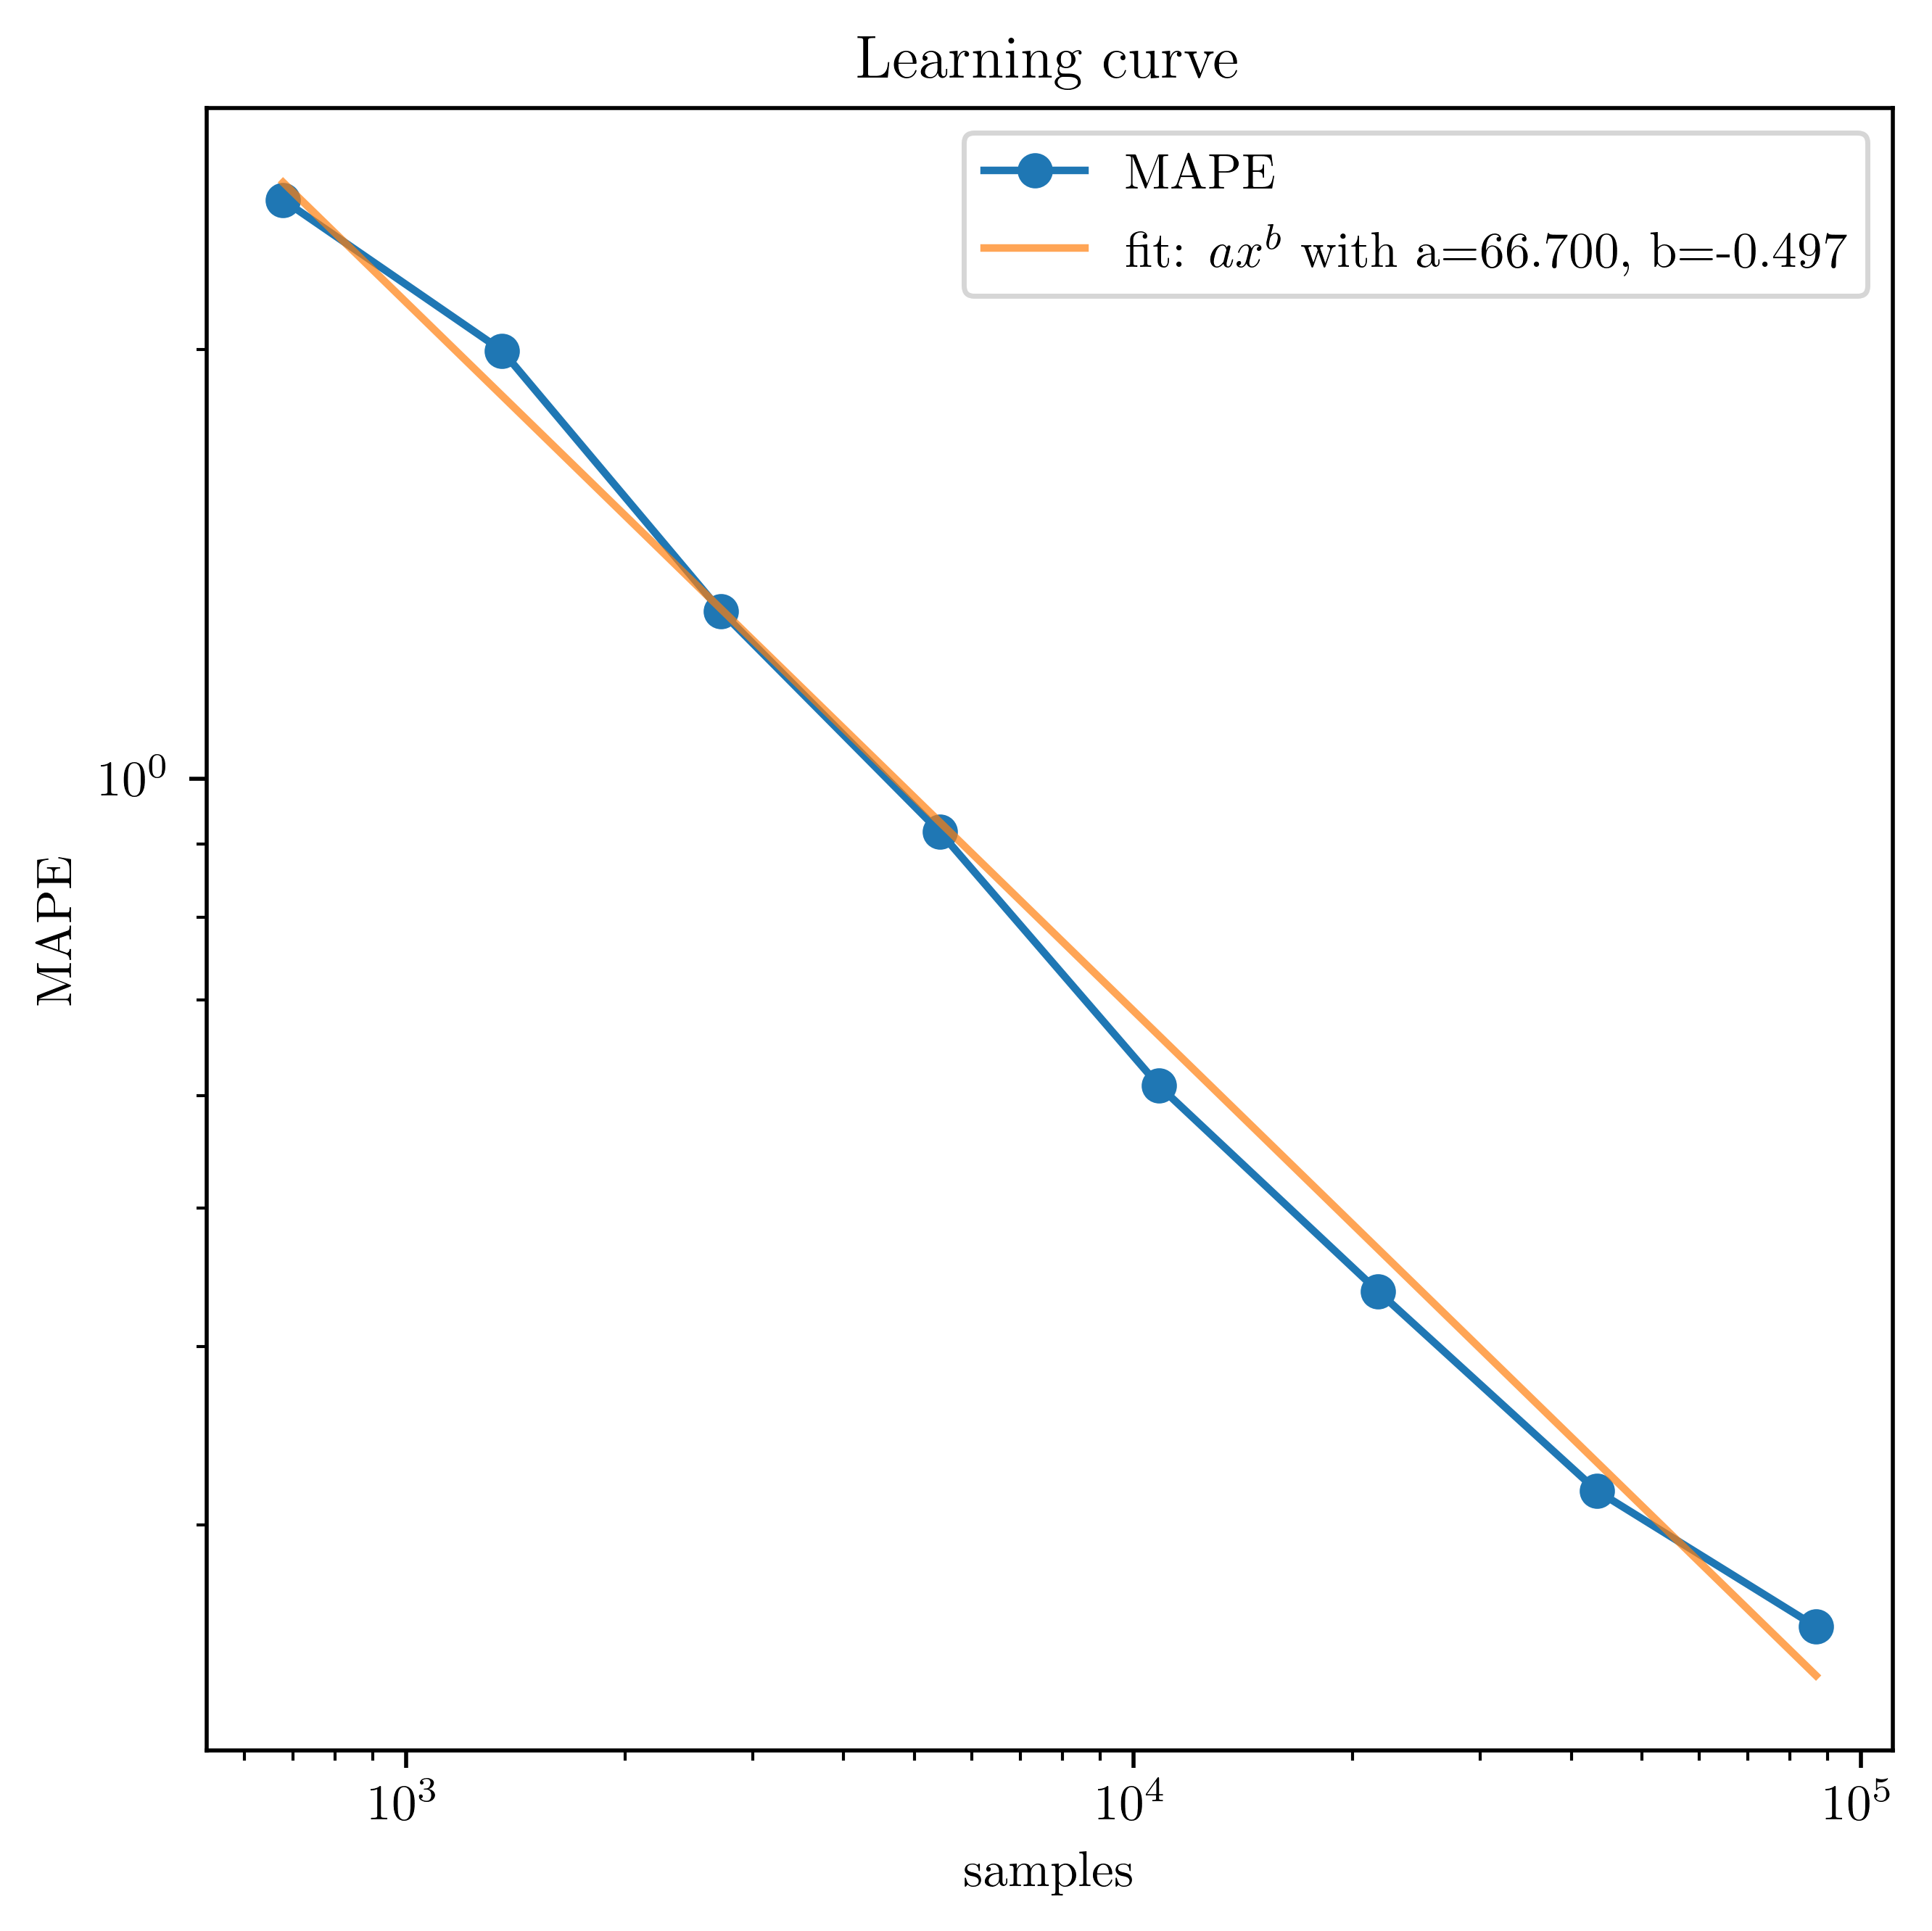

In [164]:
plot_lc(x="samples", y="MAPE", y_scale="log", x_scale = "log");